In [15]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

In [3]:
def load_data_for_regression(filename, nrows=None):
	data = pd.read_csv(filename, nrows=nrows)
	# data.rename(columns={"CH": "Curah Hujan"}, inplace=True)
	return data

# PREPROCESSING DATA
def preprocessed_data(dataframe):
	# Fill missing values in QFF Column
	dataframe['QFF'].fillna(dataframe['QFF'].mean(), inplace=True)
	return dataframe

In [19]:
dir = 'peramalan_cuaca_bmkg_dev/dataset/'
filename = 'fklim-ngrai-20112020-final.csv'
dirfile = os.path.join(dir, filename)
df = load_data_for_regression(filename=dirfile)
df = preprocessed_data(df)

dropped_cols = ['Date', 'Tahun', 'Bulan', 'Tanggal', 'Cuaca Khusus']
df.drop(dropped_cols, axis=1, inplace=True)
df.head()

,T0700,T1300,T1800,Trata-rata,Tmax,Tmin,CH,LPM,QFE,RH0700,RH1300,RH1800,RHrata-rata,ffrata-rata,dd,ffmax,ddmax,QFF
0,25.1,27.0,26.4,25.9,29.0,24.7,1.0,33,1004.1,95,90,86,92,3,90,8.0,70,1010.36396
1,26.4,30.6,26.9,27.6,30.6,25.5,0.8,46,1005.9,86,75,90,84,4,320,12.0,290,1010.36396
2,25.4,30.3,26.0,26.8,31.2,24.8,0.8,63,1005.6,93,77,91,89,3,90,8.0,50,1010.36396
3,25.2,28.6,28.3,26.8,29.5,24.4,0.0,35,1005.6,93,82,75,86,4,270,10.0,270,1010.36396
4,24.6,30.8,27.2,26.8,31.7,24.1,5.3,71,1005.3,88,72,89,84,3,50,24.0,30,1010.36396


In [20]:
len(df.columns)

18

## Show correlation

In [14]:
df.corr(method='pearson')

,T0700,T1300,T1800,Trata-rata,Tmax,Tmin,CH,LPM,QFE,RH0700,RH1300,RH1800,RHrata-rata,ffrata-rata,dd,ffmax,ddmax,QFF
T0700,1.000000,0.483654,0.508128,0.869759,0.545710,0.763218,0.086764,-0.046580,-0.386226,-0.292331,0.101378,0.055513,-0.126145,0.110427,0.207171,0.161992,0.218334,-0.393007
T1300,0.483654,1.000000,0.726353,0.785944,0.887798,0.397884,-0.160825,0.287266,-0.297898,-0.059024,-0.454790,-0.201381,-0.255472,-0.282467,-0.061932,-0.181758,0.041475,-0.290334
T1800,0.508128,0.726353,1.000000,0.796198,0.777559,0.401589,-0.069569,0.155727,-0.452660,0.035616,-0.059528,-0.369134,-0.107608,-0.248867,0.126707,-0.150850,0.215439,-0.441151
Trata-rata,0.869759,0.785944,0.796198,1.000000,0.802698,0.674314,-0.017998,0.102418,-0.443850,-0.171310,-0.093548,-0.130585,-0.175969,-0.092779,0.141719,-0.003343,0.204255,-0.441494
Tmax,0.545710,0.887798,0.777559,0.802698,1.000000,0.412118,-0.068591,0.188977,-0.369356,-0.029778,-0.276449,-0.178083,-0.167483,-0.335245,0.050156,-0.146483,0.133276,-0.358988
Tmin,0.763218,0.397884,0.401589,0.674314,0.412118,1.000000,0.026714,-0.007411,-0.274897,-0.140418,0.099447,0.081368,-0.026685,0.070250,0.078654,0.064282,0.095897,-0.272598
CH,0.086764,-0.160825,-0.069569,-0.017998,-0.068591,0.026714,1.000000,-0.256787,-0.229618,0.150920,0.355103,0.287584,0.301481,0.095766,0.289126,0.306151,0.271204,-0.218058
LPM,-0.046580,0.287266,0.155727,0.102418,0.188977,-0.007411,-0.256787,1.000000,0.182896,-0.152213,-0.358407,-0.258150,-0.293987,-0.031205,-0.251832,-0.144085,-0.223448,0.159833
QFE,-0.386226,-0.297898,-0.452660,-0.443850,-0.369356,-0.274897,-0.229618,0.182896,1.000000,-0.184584,-0.291669,-0.151094,-0.259604,-0.000722,-0.407759,-0.130792,-0.445998,0.919412
RH0700,-0.292331,-0.059024,0.035616,-0.171310,-0.029778,-0.140418,0.150920,-0.152213,-0.184584,1.000000,0.395169,0.362667,0.858909,-0.254261,0.099202,-0.148533,0.104996,-0.148570


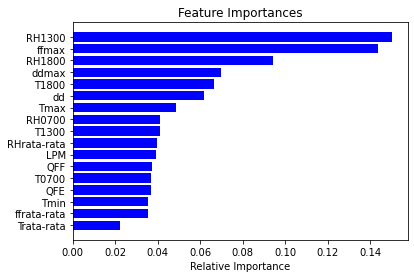

In [17]:
from sklearn.ensemble import RandomForestRegressor

rfe_selector = RandomForestRegressor()
rfe_selector.fit(df.drop('CH', axis=1), df['CH'])
importances = rfe_selector.feature_importances_
idxs = np.argsort(importances)
plt.title('Feature Importances')
plt.barh(range(len(idxs)), importances[idxs], color='b', align='center')
plt.yticks(range(len(idxs)), df.drop('CH', axis=1).columns[idxs])
plt.xlabel('Relative Importance')
plt.show()

array([ 3, 12,  5,  7,  0, 16,  6, 11,  1,  8,  4, 13,  2, 15, 10, 14,  9])